In [3]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import qrcode

import os

# This notebook is a look at the problems that arose in Flint Michigan when Dr. Mona Hanna-Attisha found elevated lead levels in the blood of her young patients linked to lead contamination in the recently-changed water system but was told by the state that here findings were incorrect

https://theconversation.com/how-zip-codes-nearly-masked-the-lead-problem-in-flint-65626

https://www.mlive.com/news/flint/2015/09/state_says_its_data_shows_no_c.html


# Flint, MI wards shapefile:

https://gcmpc-data-portal-1-gccountymi.hub.arcgis.com/datasets/GCcountymi::wards22/explore?location=42.631841%2C-83.577428%2C6.57

In [4]:
flint = gpd.read_file(os.getcwd()+'/Wards22')
flint.head()

,FID,LONGNAME,SHORTNAME,DISTRICT,COLOR,TOTAL,TARGET_DEV,TOTALHISP,TOTALHISP_,TOTALNH,...,ASIANNH_P,HPINH,HPINH_P,OTHERNH,OTHERNH_P,MLTMNNH,MLTMNNH_P,Shape__Are,Shape__Len,geometry
0,1,Ward 1,1,1,-4276608,9015,-13,170,1.89,8845,...,0.20,2,0.02,63,0.70,119,1.32,1.334827e+07,18197.938716,"POLYGON ((-9321352.852 5320667.317, -9321353.0..."
1,2,Ward 2,2,2,-707715200,9062,34,195,2.15,8867,...,0.25,4,0.04,40,0.44,131,1.45,1.544307e+07,23774.466002,"POLYGON ((-9321941.307 5316541.653, -9321929.4..."
2,3,Ward 3,3,3,647467648,9061,33,555,6.13,8506,...,0.29,11,0.12,75,0.83,115,1.27,3.322078e+07,39541.388927,"POLYGON ((-9317871.243 5323488.725, -9317331.6..."
3,4,Ward 4,4,4,1429491328,9023,-5,889,9.85,8134,...,0.60,9,0.10,134,1.49,74,0.82,1.537938e+07,19647.454646,"POLYGON ((-9315273.961 5315856.714, -9315305.0..."
4,5,Ward 5,5,5,1061972352,9022,-6,397,4.40,8625,...,1.22,10,0.11,109,1.21,107,1.19,1.667878e+07,21767.911439,"POLYGON ((-9315759.108 5314973.319, -9315761.1..."


# CDC SVI census tract data:

https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html

In [5]:
svi_gdf = gpd.read_file(os.getcwd()+'/SVI2020_US')

In [6]:
svi_gdf.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRA,MP_OTHERRA,SHAPE_STAr,SHAPE_STLe,geometry
0,01,Alabama,AL,01001,Autauga,01001020100,"Census Tract 201, Autauga County, Alabama",3.793570,1941,390,...,1.8,0.0,1.8,6.6,5.1,0.0,1.8,0.000949,0.150118,"POLYGON ((-86.50910 32.47349, -86.50577 32.475..."
1,01,Alabama,AL,01001,Autauga,01001020200,"Census Tract 202, Autauga County, Alabama",1.282174,1757,310,...,2.0,0.0,2.0,2.6,3.0,0.8,1.1,0.000318,0.092328,"POLYGON ((-86.48093 32.48154, -86.47945 32.485..."
2,01,Alabama,AL,01001,Autauga,01001020300,"Census Tract 203, Autauga County, Alabama",2.065364,3694,570,...,0.9,0.0,0.9,1.8,2.3,0.0,0.9,0.000516,0.100175,"POLYGON ((-86.47087 32.47573, -86.46964 32.478..."
3,01,Alabama,AL,01001,Autauga,01001020400,"Census Tract 204, Autauga County, Alabama",2.464984,3539,500,...,0.5,0.0,1.0,2.9,2.8,0.0,1.0,0.000607,0.113935,"POLYGON ((-86.45394 32.49318, -86.45308 32.493..."
4,01,Alabama,AL,01001,Autauga,01001020501,"Census Tract 205.01, Autauga County, Alabama",2.395243,4306,662,...,0.8,0.0,0.8,0.3,0.6,0.0,0.8,0.000597,0.108866,"POLYGON ((-86.43816 32.45069, -86.43773 32.451..."


In [7]:
states_gdf = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k')

# Zip code shapefile

In [8]:
zip_gdf = gpd.read_file(os.getcwd()+'/tl_2019_us_zcta510',dtype={'ZCTA5CE10':str})
zip_gdf.rename(columns={'ZCTA5CE10':'zip_code'},inplace=True)

In [9]:
zip_gdf.head()

,zip_code,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


<AxesSubplot: >

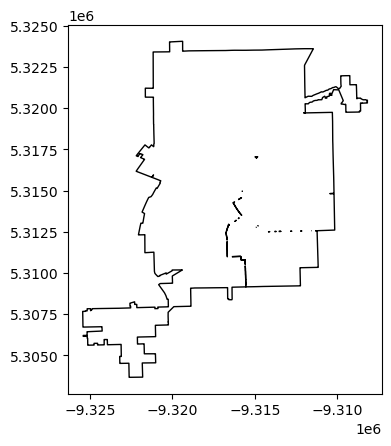

In [10]:
polygon = flint.geometry.unary_union
gdf2 = gpd.GeoDataFrame(geometry=[polygon], crs='epsg:2163')
gdf2.plot(edgecolor='black',color='none')

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


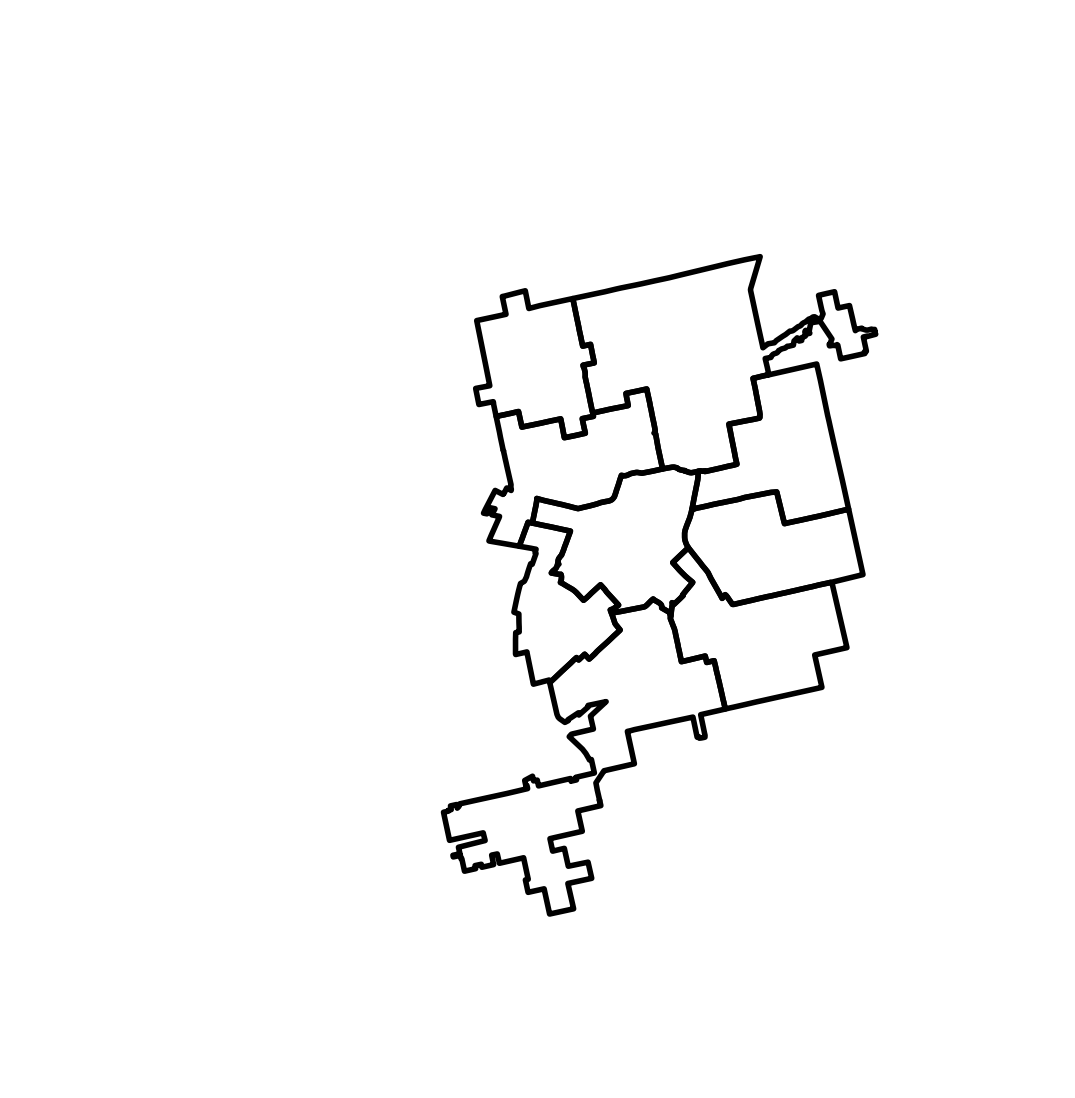

In [11]:
fig, ax = plt.subplots(1, figsize=(18, 14))
zip_gdf[zip_gdf.zip_code.isin(['48505','48505','48506','48503','48502','48507','48532','48504'])].to_crs({'init':'epsg:2163'}).plot(ax=ax,alpha=.5,color='none',edgecolor='white')
flint.to_crs({'init':'epsg:2163'}).plot(ax=ax,color='none',edgecolor='black',alpha=1,linewidth=4)
# svi_gdf[(svi_gdf.COUNTY=='Genesee')&(svi_gdf.ST_ABBR=='MI')].to_crs({'init':'epsg:2163'}).plot(edgecolor='white',color='none',ax=ax,alpha=.2)
# res_union.plot(ax=ax,color='green',alpha=.3)
ax.axis('off')
fig.savefig(os.getcwd()+'/flint.png',dpi=400, bbox_inches="tight")

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


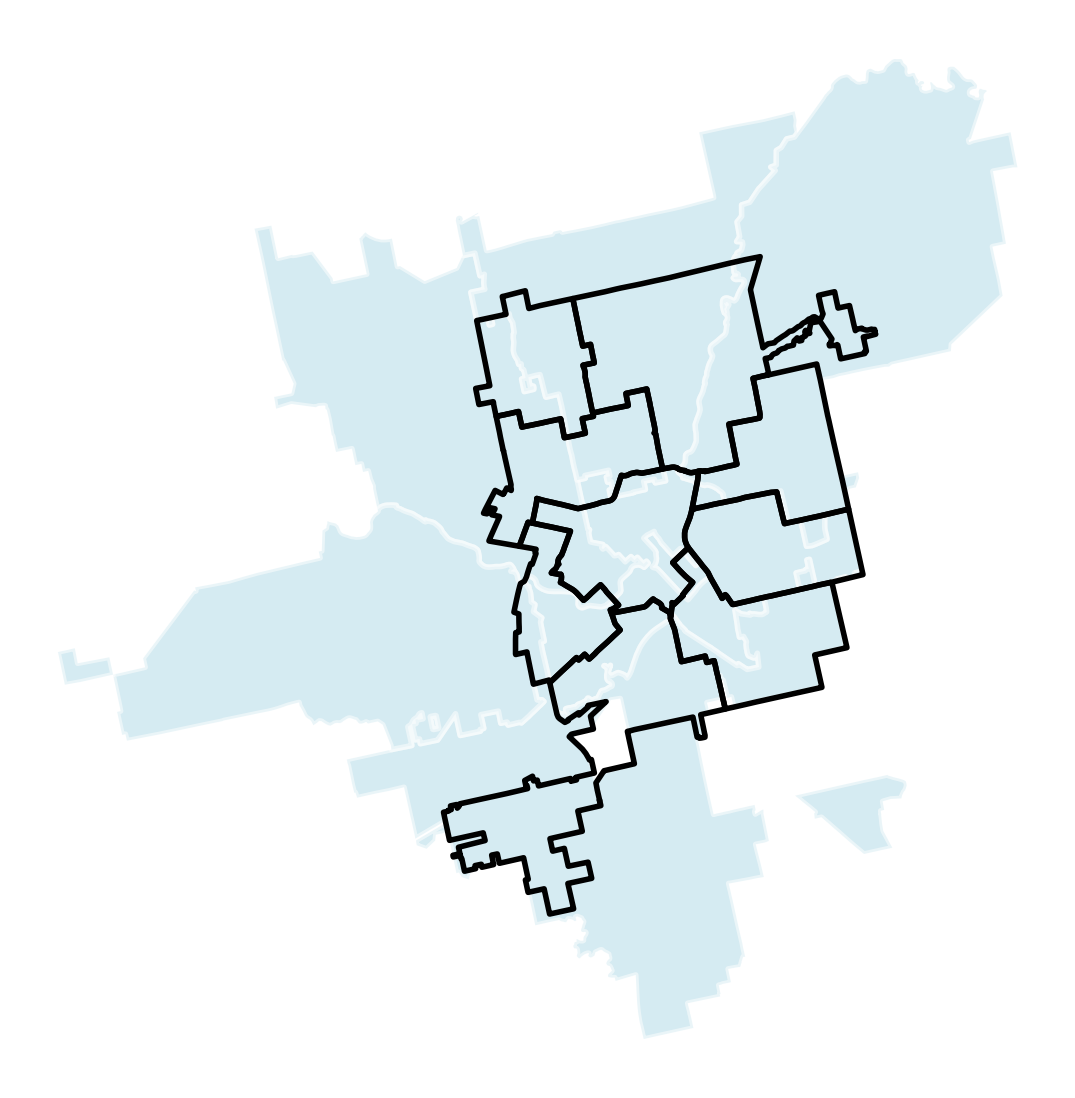

In [12]:
fig, ax = plt.subplots(1, figsize=(18, 14))
zip_gdf[zip_gdf.zip_code.isin(['48505','48505','48506','48503','48502','48507','48532','48504'])].to_crs({'init':'epsg:2163'}).plot(ax=ax,alpha=.5,color='lightblue',edgecolor='white',linewidth=4)
flint.to_crs({'init':'epsg:2163'}).plot(ax=ax,color='none',edgecolor='black',alpha=1,linewidth=4)
# svi_gdf[(svi_gdf.COUNTY=='Genesee')&(svi_gdf.ST_ABBR=='MI')].to_crs({'init':'epsg:2163'}).plot(edgecolor='white',color='none',ax=ax,alpha=.2)
# res_union.plot(ax=ax,color='green',alpha=.3)
ax.axis('off')
fig.savefig(os.getcwd()+'/flint_plus_zips.png',dpi=400, bbox_inches="tight")

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


NameError: name 'res_union' is not defined

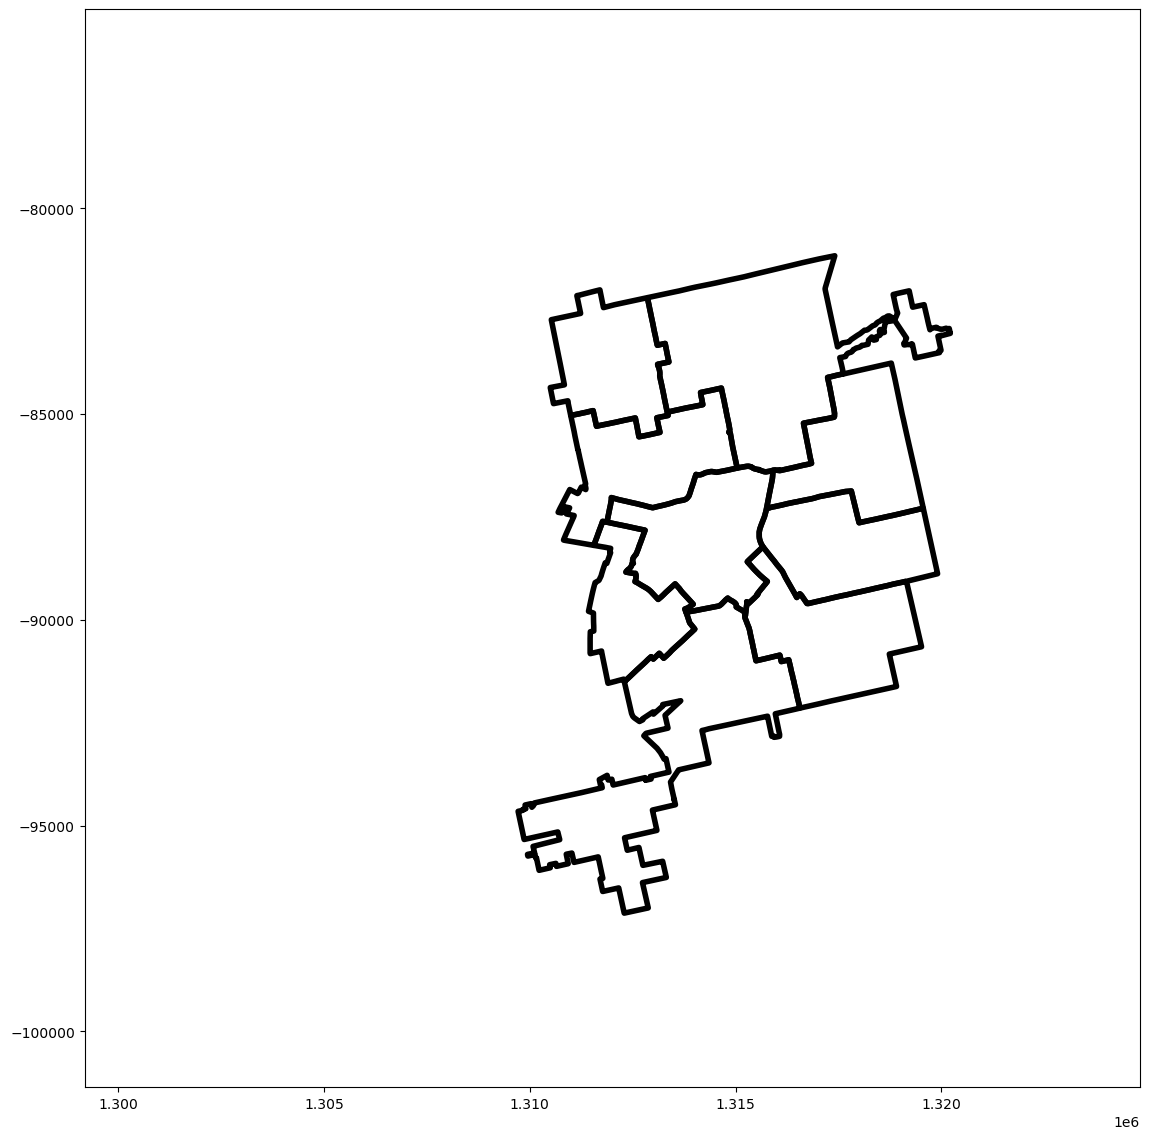

In [13]:
fig, ax = plt.subplots(1, figsize=(18, 14))
zip_gdf[zip_gdf.zip_code.isin(['48505','48505','48506','48503','48502','48507','48532','48504'])].to_crs({'init':'epsg:2163'}).plot(ax=ax,alpha=.5,color='none',edgecolor='white')
flint.to_crs({'init':'epsg:2163'}).plot(ax=ax,color='none',edgecolor='black',alpha=1,linewidth=4)
# svi_gdf[(svi_gdf.COUNTY=='Genesee')&(svi_gdf.ST_ABBR=='MI')].to_crs({'init':'epsg:2163'}).plot(edgecolor='white',color='none',ax=ax,alpha=.2)
res_union.plot(ax=ax,color='seagreen',alpha=.3,edgecolor='green',linewidth=3)
ax.axis('off')
fig.savefig(os.getcwd()+'/flint_plus_tracts.png',dpi=400, bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 14))
zip_gdf[zip_gdf.zip_code.isin(['48505','48505','48506','48503','48502','48507','48532','48504'])].to_crs({'init':'epsg:2163'}).plot(ax=ax,alpha=.5,color='lightblue',edgecolor='white',linewidth=4)
flint.to_crs({'init':'epsg:2163'}).plot(ax=ax,color='none',edgecolor='black',alpha=1,linewidth=4)
# svi_gdf[(svi_gdf.COUNTY=='Genesee')&(svi_gdf.ST_ABBR=='MI')].to_crs({'init':'epsg:2163'}).plot(edgecolor='white',color='none',ax=ax,alpha=.2)
res_union.plot(ax=ax,color='seagreen',alpha=.3,edgecolor='green',linewidth=3)
ax.axis('off')
fig.savefig(os.getcwd()+'/flint_tracts_zips.png',dpi=400, bbox_inches="tight")

In [14]:
import qrcode


In [15]:
import qrcode
img = qrcode.make('https://ajph.aphapublications.org/doi/10.2105/AJPH.2015.303003')
type(img)  # qrcode.image.pil.PilImage
img.save(os.getcwd()+"/ajph_paper.png")

In [16]:
img = qrcode.make('https://theconversation.com/how-zip-codes-nearly-masked-the-lead-problem-in-flint-65626')
type(img)  # qrcode.image.pil.PilImage
img.save(os.getcwd()+"/richard_casey_saddler_article.png")

In [17]:
img = qrcode.make('https://geographicdata.science/book/intro.html')
type(img)  # qrcode.image.pil.PilImage
img.save(os.getcwd()+"/geospatial_data_science_w_python_text.png")

In [18]:

img = qrcode.make('https://geopandas.org/en/stable/docs.html')
type(img)  # qrcode.image.pil.PilImage
img.save(os.getcwd()+"geopandas_documentation.png")

In [21]:
img = qrcode.make('https://github.com/alexF3/map_us_hunger/blob/main/Python_mapping_tutorial.ipynb')
type(img)  # qrcode.image.pil.PilImage
img.save(os.getcwd()+"/first_python_map.png")